# Imports and packages

In [1]:
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=25b40c8450f079dd8245b4b8a35b0a79315a81e1cd96be5571a03427b4fa12a0
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [2]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import random
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torchinfo import summary

from emoji import UNICODE_EMOJI

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
stopwords_set = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Base de treino - classificado

In [7]:
df_train = pd.read_feather('/content/drive/Shareddrives/TCC/Dados/código/dataset_grande/big_train_dataset.feather')
df_val = pd.read_feather('/content/drive/Shareddrives/TCC/Dados/código/dataset_grande/big_val_dataset.feather')
df_test = pd.read_feather('/content/drive/Shareddrives/TCC/Dados/código/dataset_grande/big_test_dataset.feather')

display(df_train)
display(df_val)
display(df_test)

,index,text,label
0,0,@9s_Watch @FuckChina721831 @MOFA_Taiwan @WHO T...,0.0
1,1,"IF THIS GOES ANY FURTHER, WITH CORONA VIRUS; T...",0.0
2,2,BBC News - Coronavirus : South Korean sect ide...,1.0
3,3,Unique ordeal': Wuhan evacuees head home after...,1.0
4,4,"Salam, kmss ada group support tak for ladies? ...",1.0
...,...,...,...
1167510,999333,chink boi wna walk,0.0
1167511,999334,what the fuckkkkkk ? ? ? ? ? ? . . . how can i...,0.0
1167512,999336,damn covid .,0.0
1167513,999340,"hey jack ma . the entire world mess ""chinese v...",0.0


,index,text,label
0,0,@cfyneufx123 @kpru This mongoloid came to kill...,0.0
1,1,"Holy shit, based ching chong alert. 🚨 https://...",0.0
2,2,The MSM gives you disinfectants that MAY kill ...,1.0
3,3,"No kiss, No hug #coronavirus",1.0
4,4,@parasocialanxi1 Don't feel bad if it's the na...,1.0
...,...,...,...
145933,93887,chinese people recently kills baluchistan libe...,1.0
145934,7292,i suspects evans may 're get give monkey scrub...,1.0
145935,592046,exfuckingcuse,0.0
145936,774781,three college-age cousins covid . so that’s fu...,1.0


,index,text,label
0,0,Coronavirus Election Puts the Democrats In a D...,0.0
1,1,🦠🦠☠️☠️ You are a poor ghost from: Kenya. Nigg...,0.0
2,2,The President of the US calling COVID-19 the ‘...,0.0
3,3,@NortherntreeY @Lyndsayunihead @sarahgrowls @r...,0.0
4,4,"At the very least, China needs to be isolated...",0.0
...,...,...,...
145935,17901,we because never levels. even japanese wagyu h...,1.0
145936,167333,asian problems : non-asian friends asks transl...,1.0
145937,747222,amazing learn work . a colleague told avoid an...,1.0
145938,36361,2021 global travel forecast : what impact will...,1.0


In [8]:
from sklearn.utils import shuffle
display(df_val)

df_train = shuffle(df_train)
df_val = shuffle(df_val)
df_test = shuffle(df_test)

display(df_val)

,index,text,label
0,0,@cfyneufx123 @kpru This mongoloid came to kill...,0.0
1,1,"Holy shit, based ching chong alert. 🚨 https://...",0.0
2,2,The MSM gives you disinfectants that MAY kill ...,1.0
3,3,"No kiss, No hug #coronavirus",1.0
4,4,@parasocialanxi1 Don't feel bad if it's the na...,1.0
...,...,...,...
145933,93887,chinese people recently kills baluchistan libe...,1.0
145934,7292,i suspects evans may 're get give monkey scrub...,1.0
145935,592046,exfuckingcuse,0.0
145936,774781,three college-age cousins covid . so that’s fu...,1.0


,index,text,label
77881,518543,i donated yesterday . if afford i know help . ...,1.0
97174,107705,the continue tedtalk tuesday series observatio...,1.0
33841,104732,find handmade accessories like red coin pouch ...,1.0
39355,64047,"yeah , that’s i figured . but it’s bizarre it’...",1.0
40553,363316,"the chinese communist party root evil , bringe...",0.0
...,...,...,...
136217,421725,fuck guys,0.0
134762,570978,china bit pissed us . . . we say ditto . . . #...,0.0
68063,289956,damn bruh yo autocorrect got covid ?,0.0
126491,139628,"#spreadjoynotcovid – in partnership village , ...",1.0


In [9]:
train_y = df_train['label']
train_x = df_train['text']

val_y = df_val['label']
val_x = df_val['text']

test_y = df_test['label']
test_x = df_test['text']

# Dataprep

In [10]:
stopwords_set.add('\u200d')
stopwords_set.add(' ')

In [11]:
def removeMention(tweet):
    words = tweet.split()
    words = [word for word in words if "@" not in word ]
    newTweet = ' '.join(words)
    return newTweet

  # substituir menção por <USER>

# search your emoji
def is_emoji(s, language="en"):
    return s in UNICODE_EMOJI[language]

# add space near your emoji
def add_space(text):
    return ''.join(' ' + char + ' ' if is_emoji(char) else char for char in text).strip()

def separateEmoji(tweet):
    return add_space(tweet)

import re
regex = re.compile("(http://t\.co.{12})|(https://t\.co.{11})")

def removeLink(tweet):
    #words = tweet.split()
    #links = [word for word in words if "t.co" in word]
    words = regex.sub('',tweet)
    return words

def splitPunctuation(tweet):
    tweet = tweet.replace(".", " . ").replace(",", " , ").replace(";", " ; ")\
        .replace("!", " ! ").replace("?", " ? ").replace(":", " : ")\
        .replace("(", " ( ").replace(")", " ) ")
    return tweet

def remove_stopwords(tweet):
    words = tweet.split()
    words = [word for word in words if not word in stopwords_set]
    newTweet = ' '.join(words)
    return newTweet

def lower_tweet(tweet):
    return tweet.lower()

In [12]:
train_x = train_x.apply(lambda x:separateEmoji(x)).apply(lambda x:removeMention(x)).apply(lambda x:removeLink(x)).apply(lambda x:splitPunctuation(x)).apply(lambda x: x.lower()).apply(lambda x:remove_stopwords(x))
val_x = val_x.apply(lambda x:separateEmoji(x)).apply(lambda x:removeMention(x)).apply(lambda x:removeLink(x)).apply(lambda x:splitPunctuation(x)).apply(lambda x: x.lower()).apply(lambda x:remove_stopwords(x))
test_x = test_x.apply(lambda x:separateEmoji(x)).apply(lambda x:removeMention(x)).apply(lambda x:removeLink(x)).apply(lambda x:splitPunctuation(x)).apply(lambda x: x.lower()).apply(lambda x:remove_stopwords(x))

train_x.head()

404615     help families get strong start supporting fund...
193265                           jap ! " celtics " appeals !
994556              course . #communistchina #communistvirus
1062319    cant see . thousands people died ! covering tr...
118504                japanese collages paper throw earrings
Name: text, dtype: object

In [13]:
# display(train_y.head())
# display(train_y.value_counts())

# train_y = train_y.mask(train_y==0, 1)
# train_y = train_y.mask(train_y==2, 0)

# val_y = val_y.mask(val_y==0, 1)
# val_y = val_y.mask(val_y==2, 0)

# test_y = test_y.mask(test_y==0, 1)
# test_y = test_y.mask(test_y==2, 0)

# display(train_y.head())
display(train_y.value_counts())

1.0    778520
0.0    388995
Name: label, dtype: int64

In [14]:
from keras.preprocessing.text import Tokenizer           

num_words = 5000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_x)

train_x_tokenized = tokenizer.texts_to_sequences(train_x)
test_x_tokenized = tokenizer.texts_to_sequences(test_x)
val_x_tokenized = tokenizer.texts_to_sequences(val_x)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

392766


In [15]:
import pickle

# saving
with open('/content/drive/Shareddrives/TCC/Dados/código/dataset_grande/lstm_bi [TODO]/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
import keras
from keras_preprocessing.sequence import pad_sequences

max_length = 280
train_x_padded = pad_sequences(train_x_tokenized, maxlen=max_length, padding='post')
test_x_padded = pad_sequences(test_x_tokenized, maxlen=max_length, padding='post')
val_x_padded = pad_sequences(val_x_tokenized, maxlen=max_length, padding='post')


In [17]:
train_x_padded = np.array(train_x_padded)
val_x_padded = np.array(val_x_padded)
test_x_padded = np.array(test_x_padded)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

# LSTM

# Bag of words

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [19]:
#train_1_ds = TensorDataset(torch.from_numpy(train_x_tok).type(torch.float32), torch.from_numpy(train_y.to_numpy()))
#train_2_ds = TensorDataset(torch.from_numpy(train_x_tok_2).type(torch.float32), torch.from_numpy(train_y_2))
train_ds = TensorDataset(torch.from_numpy(np.expand_dims(train_x_padded, axis=2)).type(torch.float32), torch.from_numpy(train_y))
#train_ds = torch.utils.data.ConcatDataset([train_1_ds, train_2_ds])
val_ds = TensorDataset(torch.from_numpy(np.expand_dims(val_x_padded, axis=2)).type(torch.float32), torch.from_numpy(val_y))
test_ds = TensorDataset(torch.from_numpy(np.expand_dims(test_x_padded, axis=2)).type(torch.float32), torch.from_numpy(test_y))

batch_size = 256
train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size)
val_dl = DataLoader(val_ds, shuffle=True, batch_size=batch_size)
test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size)

# LSTM model

In [20]:
class TweetsLSTM(nn.Module):
    def __init__(self,no_layers,hidden_dim,input_dim,drop_prob=0.5):
        super(TweetsLSTM,self).__init__()
 
        #self.output_dim = output_dim
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
    
        #print(type(self.no_layers), type(self.input_dim), type(self.hidden_dim))
        
        # embedding and LSTM layers
        #self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #lstm
        self.lstm_layers = nn.LSTM(input_size=self.input_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True, bidirectional=True)
        
        
        # dropout layer
        self.dropout_layer = nn.Dropout(p=drop_prob, inplace=True)
    
        # linear and sigmoid layer
        self.linear_layer = nn.Linear(2*self.hidden_dim, 1)
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self,x):
        #print("x:", x.shape, x.dtype)
        batch_size, _seq1 , _seq2 = x.size()
        
        lstm_out, _ = self.lstm_layers(x)
        #print("lstm out:",lstm_out.shape)
        
        # dropout and fully connected layer
        out = self.dropout_layer(lstm_out.clone()) #(h_1) lstm_out
        #print("out:", out.shape)
        lin_out = self.linear_layer(out)
        #print("lin_out: ", lin_out.shape)
        
        
        # sigmoid function
        sig_out = self.sigmoid_layer(lin_out)
        #print("out2:", sig_out.shape)
        
        sig_out_f = sig_out[:,-1,:]
        #print(sig_out.shape)
        # # return last sigmoid output and hidden state

        return sig_out_f

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros(2*self.no_layers,batch_size,self.hidden_dim).to(device)
        c0 = torch.zeros(2*self.no_layers,batch_size,self.hidden_dim).to(device)
        hidden = (h0,c0)
        return hidden

In [21]:
no_layers = 2
#vocab_size = len(vocab_to_int) + 1 #extra 1 for padding
#vocab_size = 128
embedding_dim = 64
input_dim = 1
output_dim = 3
hidden_dim = 50 #256


model = TweetsLSTM(no_layers,hidden_dim,input_dim,drop_prob=0.3).to(device)

#print(train_x_tok.shape)
dataiter = iter(train_dl)
print('sample input: ', dataiter.next()[0].size())
print('sample output: ', dataiter.next()[1].size())
print(model)
print(vocab_size)
print(200)
#summary(model, (4, max_len, 1),dtypes=[torch.int])
summary(model, input_data=torch.tensor(np.ones((4, 200, 1))).type(torch.float32).to(device))


sample input:  torch.Size([256, 280, 1])
sample output:  torch.Size([256])
TweetsLSTM(
  (lstm_layers): LSTM(1, 50, num_layers=2, batch_first=True, bidirectional=True)
  (dropout_layer): Dropout(p=0.3, inplace=True)
  (linear_layer): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid_layer): Sigmoid()
)
392766
200


Layer (type:depth-idx)                   Output Shape              Param #
TweetsLSTM                               [4, 1]                    --
├─LSTM: 1-1                              [4, 200, 100]             82,000
├─Dropout: 1-2                           [4, 200, 100]             --
├─Linear: 1-3                            [4, 200, 1]               101
├─Sigmoid: 1-4                           [4, 200, 1]               --
Total params: 82,101
Trainable params: 82,101
Non-trainable params: 0
Total mult-adds (M): 65.60
Input size (MB): 0.00
Forward/backward pass size (MB): 0.65
Params size (MB): 0.33
Estimated Total Size (MB): 0.98

In [22]:
# loss and optimization functions
lr=0.0001

def BCELoss_class_weighted(weights):
    def loss(input, target):
        input = torch.clamp(input,min=1e-7,max=1-1e-7)
        bce = - weights[1] * target * torch.log(input) - (1 - target) * weights[0] * torch.log(1 - input)
        return torch.mean(bce)
    return loss

weights = [len(train_y)/(2*(len(train_y)-train_y.sum())), len(train_y)/(2*train_y.sum())]
criterion = BCELoss_class_weighted(weights)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    #pred = torch.round(pred.squeeze())
    #print(pred, label, torch.sum(pred == label.squeeze()).item())
    return torch.sum(((pred >= 0.5).type(torch.float32) == label.squeeze()).type(torch.float32)).item()

In [ ]:
clip = 5
epochs = 50
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]
print(len(train_dl.dataset))
print(len(val_dl.dataset))



for epoch in range(epochs):
    print("epoch:", epoch)
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    for inputs, labels in train_dl:
        #print(inputs.shape)
        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
      
        optimizer.zero_grad()
        output = model(inputs)
        
        # calculate the loss and perform backprop
        #print("output:",output.shape, output[0].shape, output[0].dtype)
        #print("labels:",labels.shape, labels.dtype)
        #print(output, torch.max(labels,1)[1])
        #print(output.T, labels.type(torch.float32))
        loss = criterion(torch.squeeze(output, 1).type(torch.float32), labels.type(torch.float32))
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        #accuracy = acc(output,labels)
        accuracy = acc(torch.squeeze(output, 1).type(torch.float32), labels.type(torch.float32))
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        #nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in val_dl:
            #print(inputs.shape)
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            #print("output:",output.squeeze())
            #print("labels:",labels.long())
            val_loss = criterion(torch.squeeze(output, 1).type(torch.float32), labels.type(torch.float32))

            val_losses.append(val_loss.item())
            
            accuracy = acc(torch.squeeze(output, 1).type(torch.float32), labels.type(torch.float32))
            val_acc += accuracy
            epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_dl.dataset)
    epoch_val_acc = val_acc/len(val_dl.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), f'model_loss_00001-{epoch_val_loss}_acc-{epoch_val_acc}')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

1167515
145938
epoch: 0


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=[i for i in range(50)], y=epoch_vl_loss,
                    mode='lines+markers',
                    name='loss'))
fig.add_trace(go.Scatter(x=[i for i in range(50)], y=epoch_vl_acc,
                    mode='lines+markers',
                    name='acc'))
fig.show()

In [ ]:
model = TweetsLSTM(no_layers,hidden_dim,input_dim,drop_prob=0.3)
model.load_state_dict(torch.load('/kaggle/working/model_loss_00001-0.4798233907558872_acc-0.7717592402253012'))
model.to(device)
model.eval()

# model.load_state_dict(torch.load('model_weights.pth'))

<class 'int'> <class 'int'> <class 'int'>


TweetsLSTM(
  (lstm_layers): LSTM(1, 50, num_layers=2, batch_first=True)
  (dropout_layer): Dropout(p=0.3, inplace=True)
  (linear_layer): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid_layer): Sigmoid()
)

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def predict_text(inputs):
    output = model(inputs)
    return output

corrects = 0
total = 0
TP = 0
TN = 0
FP = 0
FN = 0
all_pred_bin = np.empty((1,0))
all_labels = np.empty((1,0))

for inputs, labels in test_dl:
    #print(inputs.shape)
    inputs, labels = inputs.to(device), labels.to(device)
    pred_test = predict_text(inputs)
    #print(torch.squeeze(pred_test, 1).type(torch.float32))
    all_pred_bin = np.append(all_pred_bin, (torch.squeeze(pred_test, 1).type(torch.float32) >= 0.5).type(torch.int).detach().cpu().numpy())
    all_labels = np.append(all_labels, labels.detach().cpu().numpy())
    #print(torch.squeeze(pred_test.T, 0), labels.type(torch.float32))
    corrects += acc(torch.squeeze(pred_test, 1).type(torch.float32), labels.type(torch.float32))#acc(pred_test, labels)
    #print(corrects)
    total += len(pred_test)

print(precision_recall_fscore_support(all_labels, all_pred_bin, average='binary', pos_label=0))
print(confusion_matrix(all_labels, all_pred_bin))
print(classification_report(all_labels, all_pred_bin))

print(corrects/total)
print(all_pred_bin.shape, all_pred_bin)
print(all_labels.shape, all_labels)
print("f1: ", f1_score(all_labels, all_pred_bin, pos_label=0))
print("recall: ", recall_score(all_labels, all_pred_bin, pos_label=0))
print("precision: ", precision_score(all_labels, all_pred_bin, pos_label=0))
print("accuracy: ", accuracy_score(all_labels, all_pred_bin))

(0.6341416907902719, 0.7524734146491968, 0.6882584237954584, None)
[[36583 12034]
 [21106 76217]]
              precision    recall  f1-score   support

         0.0       0.63      0.75      0.69     48617
         1.0       0.86      0.78      0.82     97323

    accuracy                           0.77    145940
   macro avg       0.75      0.77      0.75    145940
weighted avg       0.79      0.77      0.78    145940

0.7729203782376319
(145940,) [1. 1. 1. ... 1. 1. 0.]
(145940,) [1. 1. 1. ... 1. 1. 1.]
f1:  0.8214189487751516
recall:  0.7831345108556045
precision:  0.8636389389355361
accuracy:  0.7729203782376319


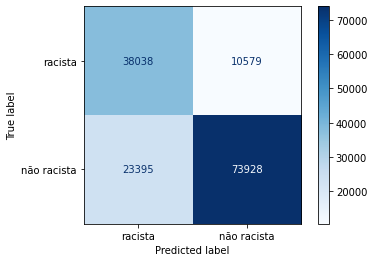

In [ ]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix(all_labels, all_pred_bin), display_labels=['racista','não racista'])
disp.plot(cmap='Blues')
plt.show()